<a href="https://colab.research.google.com/github/Luke-Dev-Tech/PytorchNotebooks/blob/main/Pytorch_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JUST DOOOOO ITTTT
https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__


'2.8.0+cu126'

In [ ]:
# 1 data preparing and loading


# let's us use linear regression
# y = weight * x + bias

weight = 0.7 # slope / gradient
bias = 0.3 # y-intercept


start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step)
# print(X)
# print(X.unsqueeze(dim=0))
X = torch.arange(start, end, step).unsqueeze(dim=1)
# print(X, X.shape)
y = weight * X + bias
print('x : ', X[:10], '\ny : ', y[:10] )

x :  tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) 
y :  tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


### Splitting trainning and testing

you do this manually here lol

But you can do it with Sklearn as well.

In [ ]:
train_split_index = int(0.8 * len(X))
X_train, y_train = X[:train_split_index], y[:train_split_index]
X_test, y_test = X[train_split_index:], y[train_split_index: ]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
from prompt_toolkit.shortcuts.progress_bar.formatters import Label
def plot_predictions(train_data,
                      train_labels,
                      test_data,
                      test_labels,
                      predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  plt.xlabel('X')
  plt.ylabel('y')

  # training data in blue
  plt.scatter(train_data, train_labels, c='b', s=14, label='Training data')
  # training data in green
  plt.scatter(test_data, test_labels, c='g', s=18, label='Testing data')

  if predictions is not None:
    # predictions in red
    plt.scatter(test_data, predictions, c='r', s=8, label='Predictions')

  plt.legend(prop={'size': 14}) # prop is for adjusting the size of the lable
  plt.show()

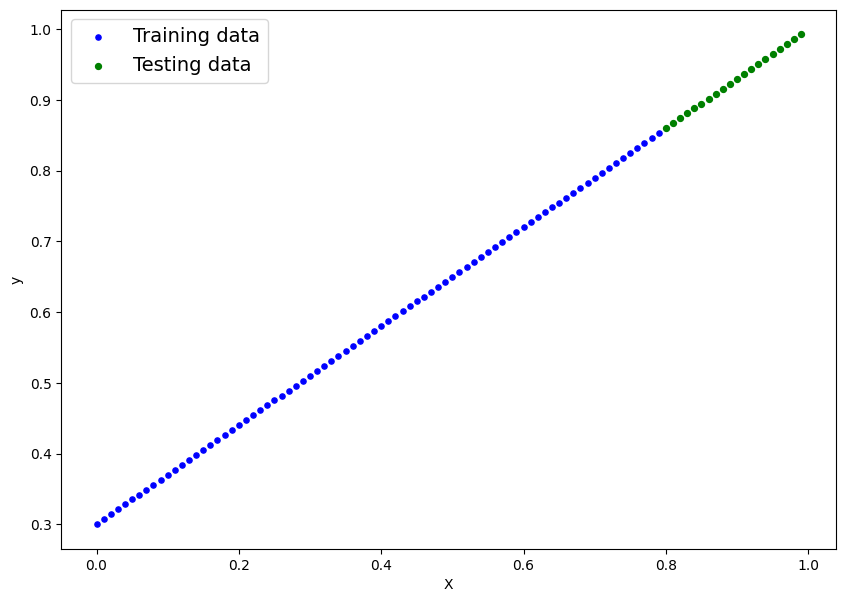

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [ ]:
# First pythorch model


# Linear regression
# create a linear regression model class (it is just inheritance)


# 1. Start with random values (weight and bias)
# 2. Look at the training data and adjust the random values
# --> Gradient Descent
# --> Backpropagation
class LinearRegressionModel(nn.Module): # <-- Almost everything in Pytorch extends nn.model
  def __init__(self):
    super().__init__()

    # what does these means?
    # requires_grad = Boolean (Can this parameter be updated via gradient decent?)
    # dtype = torch.float (Pytorch loves datatype torch.float32)
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))



  # in Python methods -> is just describing return type. nothing more.
  # Forward defines the computation performed in the model
  # any types of nn.Model needs to override forward()

  # Simplified: define the formula or logic (Mathematical formula)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.weights

In [ ]:
# python model essentials
# --> torch.nn - contains all the building for computational graphs
# --> torch.nn.Parameter - what parameter should our model try and learn
# --> torch.nn.Module - The based class for all nn modules, if you subclass it you should override forward()


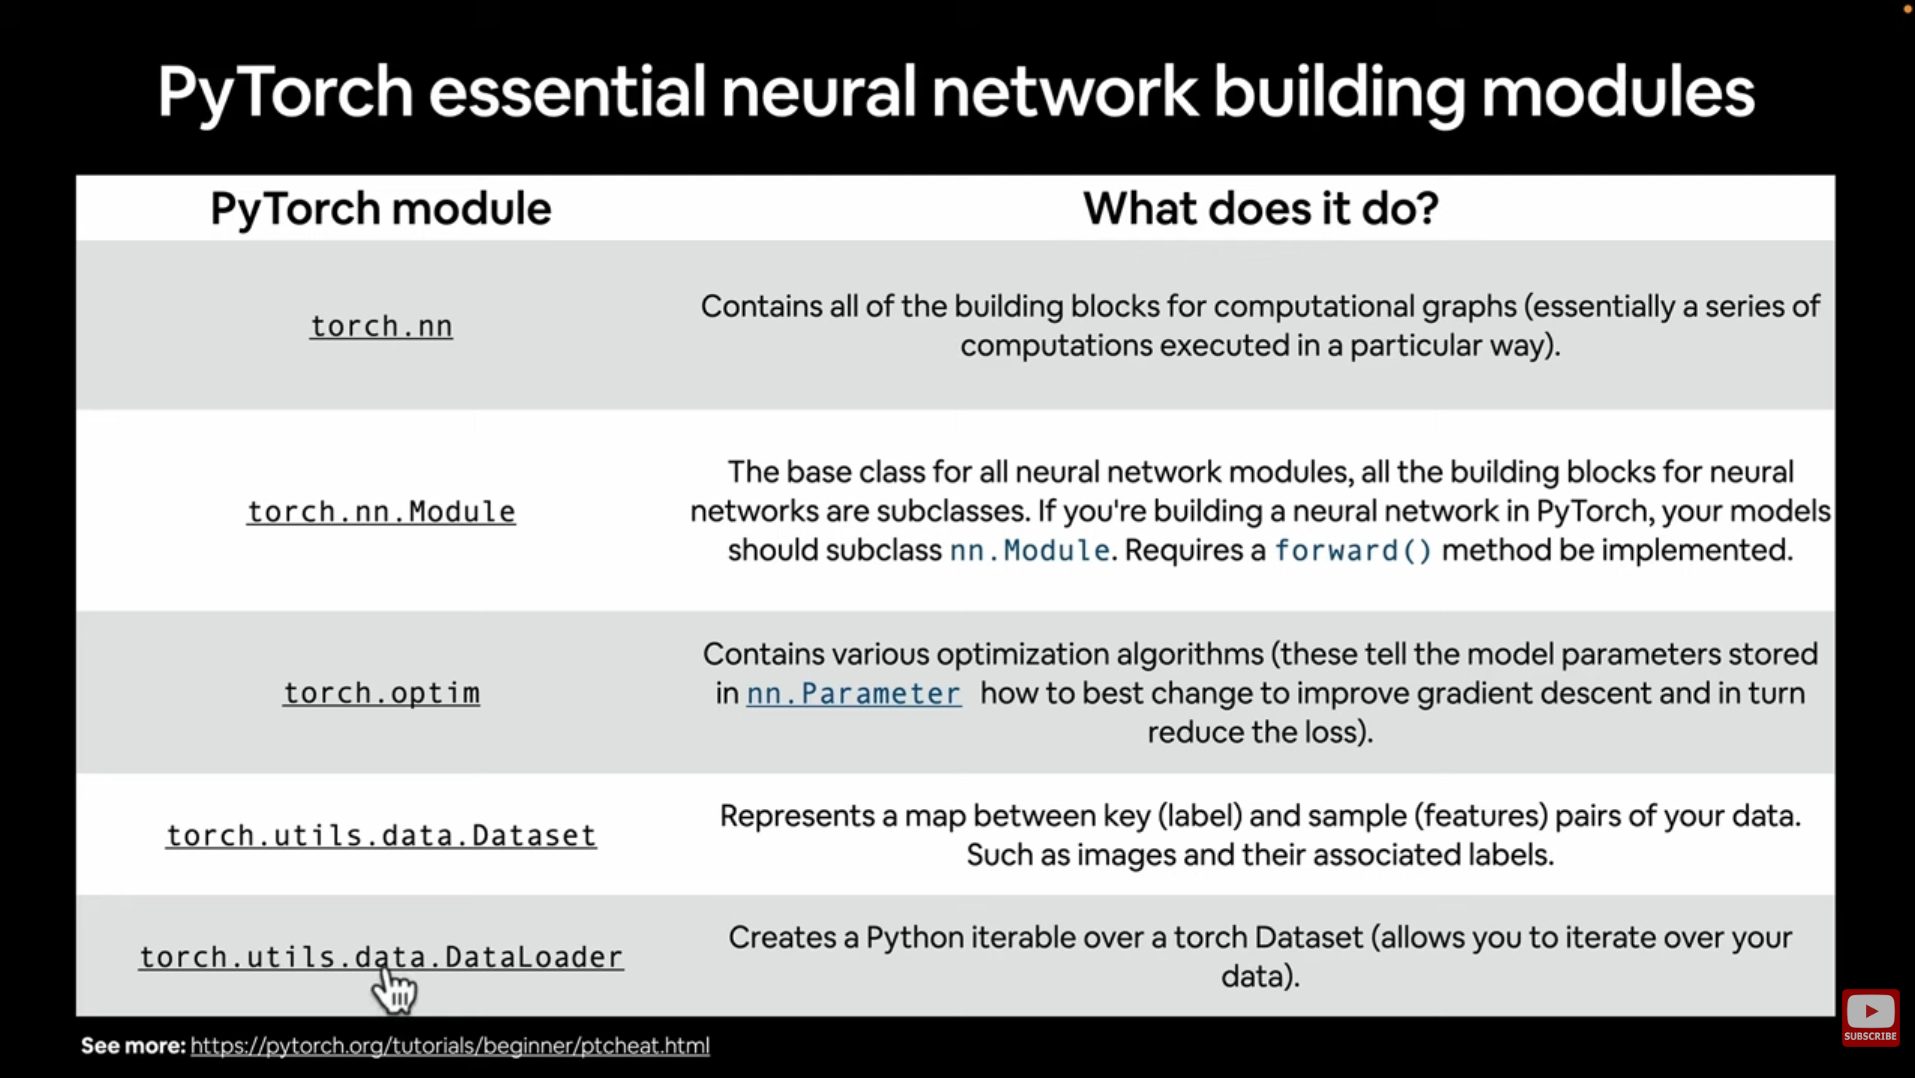

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42) # by doing this we can prevent the random_ everytime we run.

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:

# the state (what the model contains) of the model
model_0.state_dict() # List named parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
# Make prediction using torch.inference_mode()


# it is saying like this "Use the same model, but don’t update anything — just predict outputs.”"

# Even though the __init__() (constructor) of your class
# takes no arguments,
# you can still call your model with inputs like this because
# of how PyTorch’s nn.Module is designed.

# model_0(X_test)
# this doesn’t directly call your forward() method —
# instead, it calls nn.Module.__call__() first (which is defined deep inside PyTorch).

# That method does a few things:

# Handles things like hooks, gradient tracking, etc.

# Then internally calls your model’s forward() method
with torch.inference_mode(): # inference mode --> turns off the grad-track. (Faster)
  y_preds = model_0(X_test) # this time training all

y_preds

tensor([[0.6060],
        [0.6094],
        [0.6128],
        [0.6161],
        [0.6195],
        [0.6229],
        [0.6262],
        [0.6296],
        [0.6330],
        [0.6363],
        [0.6397],
        [0.6431],
        [0.6464],
        [0.6498],
        [0.6532],
        [0.6565],
        [0.6599],
        [0.6633],
        [0.6666],
        [0.6700]])

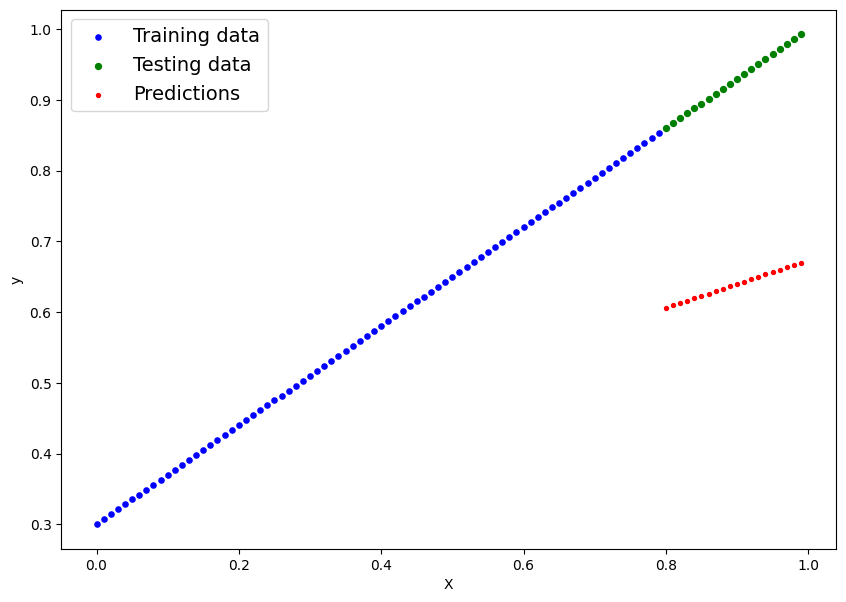

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

### Code Only

randn (-∞, +∞) [But usually around -3 to +3] --> generate samples from the normal distributation (mean 0 and variance 1). (Most values near 0, a few far away)

rand [0,1) --> generate samples from a uniform distributation (Everything has a equal change)


**randn (Normal, Standard distribution) Vs rand (uniform distribution)**


 - y=w⋅x+b

the weight w acts like the slope of a line —
it tells you how strongly and in which direction x affects y.

* If w > 0 → as x increases, y increases (positive slope 📈)

* If w < 0 → as x increases, y decreases (negative slope 📉)

so we need weight with both + and - and small preferably near 0.

if we use rand --> it focuses on [0,1)

that's why randn (-∞, +∞) and densely populate around 0 and usually around -3 and 3 is perfect fit.

https://openbooks.library.umass.edu/p132-lab-manual/wp-content/uploads/sites/26/2020/07/Bell-curve.jpg

In [ ]:
torch.rand(1) # (One Column) vector
torch.rand(2) # (row, column) matrix
torch.rand(3) # (page, row, column) tensor

print(torch.rand(1))
print(torch.rand(2))
print(torch.rand(3))
print("------------------------")
print(torch.randn(1))
print(torch.randn(2))
print(torch.randn(3))

tensor([0.9346])
tensor([0.5936, 0.8694])
tensor([0.5677, 0.7411, 0.4294])
------------------------
tensor([0.4617])
tensor([0.2674, 0.5349])
tensor([ 0.8094,  1.1103, -1.6898])


In [ ]:
torch.randn(1)

tensor([-0.9890])

## Cleaner Code Structure

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


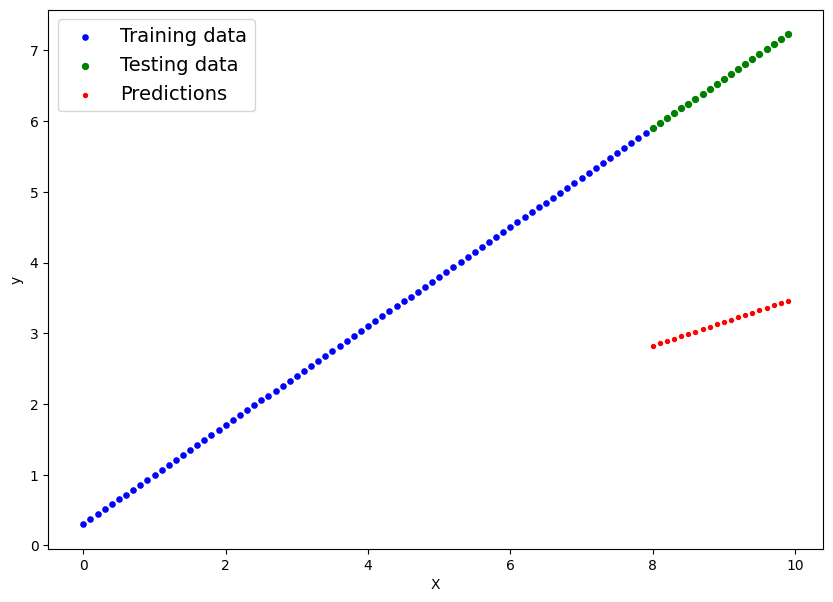

In [ ]:
# Look at this for much more cleaner Code strcture.

weight_v2 = 0.7
bias_v2 = 0.3

start_index = 0
end_index = 10
step_rate = 0.1
X = torch.arange(start=start_index, end=end_index, step=step_rate).unsqueeze(dim=1)
y = weight_v2 * X + bias_v2

train_split_index = int(0.8 * len(X))
X_train_v2, y_train_v2 = X[:train_split_index], y[:train_split_index]
X_test_v2, y_test_v2 = X[train_split_index: ], y[train_split_index:]

class LinearRegressionModel_v2(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

model_1 = LinearRegressionModel_v2()

torch.manual_seed(42)
model_1 = LinearRegressionModel_v2()
print(list(model_1.parameters()))


with torch.inference_mode():
  y_preds_v2 = model_1(X_test_v2)

plot_predictions(train_data=X_train_v2, train_labels=y_train_v2, test_data=X_test_v2, test_labels=y_test_v2, predictions=y_preds_v2)

## Training Modle (Loss function)

Training is for a model to move from some unknown parameter to some known parameters.

let's use Loss Function (Cost function) in machine learning


Loss Function --> How Wrong our model is

Optimizer --> Adjust the weight and bias to get the opitmal minimun.

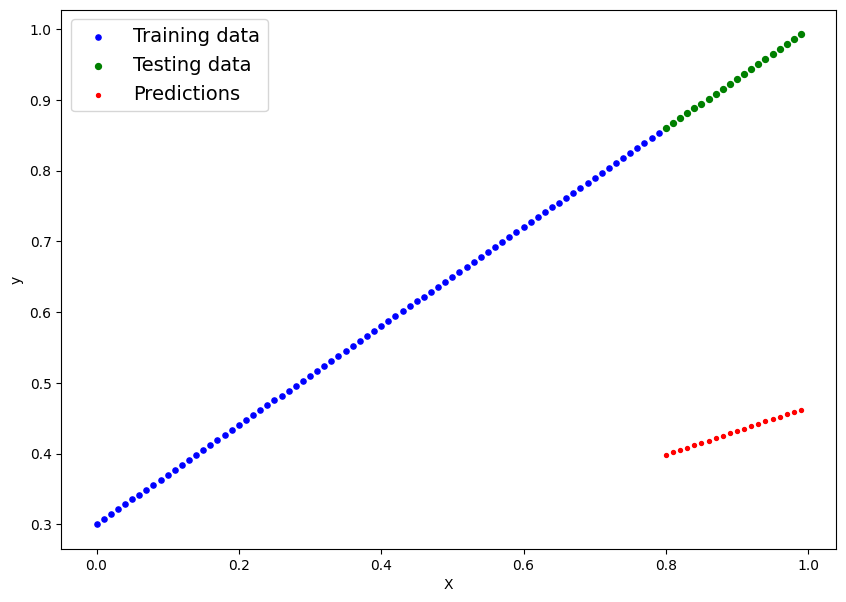

Epoch: 0 | MAE train Loss: 0.31469792127609253 | MAE Test Loss: 0.48281747102737427
Epoch: 10 | MAE train Loss: 0.19909533858299255 | MAE Test Loss: 0.3474648892879486
Epoch: 20 | MAE train Loss: 0.08958515524864197 | MAE Test Loss: 0.21752354502677917
Epoch: 30 | MAE train Loss: 0.05288771912455559 | MAE Test Loss: 0.1439102590084076
Epoch: 40 | MAE train Loss: 0.045192889869213104 | MAE Test Loss: 0.11271438747644424
Epoch: 50 | MAE train Loss: 0.04140976816415787 | MAE Test Loss: 0.09821617603302002
Epoch: 60 | MAE train Loss: 0.03795855492353439 | MAE Test Loss: 0.0888485461473465
Epoch: 70 | MAE train Loss: 0.034532517194747925 | MAE Test Loss: 0.08085694909095764
Epoch: 80 | MAE train Loss: 0.03110707364976406 | MAE Test Loss: 0.07252134382724762
Epoch: 90 | MAE train Loss: 0.027681414037942886 | MAE Test Loss: 0.06452975422143936
Epoch: 100 | MAE train Loss: 0.02425537072122097 | MAE Test Loss: 0.05653815343976021
Epoch: 110 | MAE train Loss: 0.02082989364862442 | MAE Test Loss:

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight_linear = 0.7 # inital Starting
bias_linear = 0.3   # inital Starting
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight_linear * X + bias_linear

#===============================
train_split = int(0.8 * len(X))
train_X, test_X = X[:train_split], X[train_split:]
train_y, test_y = y[:train_split], y[train_split:]

#===============================
class LinearRegression(nn.Module):
  def __init__(self, X: torch.Tensor):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias
#===============================

torch.manual_seed(42)
model_linear_reg = LinearRegression(X=train_X)

#-------------------------------
# [Visualize Prediction Before Training]
# Then internally calls your model’s forward() method
with torch.inference_mode(): # inference mode --> turns off the grad-track. (Faster)
  y_preds_before_training = model_linear_reg(test_X) # this time training all
plot_predictions(train_data=train_X,
                 train_labels=train_y,
                 test_data=test_X,
                 test_labels=test_y,
                 predictions=y_preds_before_training)
#-------------------------------
# Let's Train For Real
loss_fun = nn.L1Loss()
learning_rate = 0.01
# stochastic gradient descent
optimizer = torch.optim.SGD(params=model_linear_reg.parameters(), lr=learning_rate)

epochs = 1000

# these are for testing
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # training mode in pytorch sets all parameters that require gradients to require gradients
  model_linear_reg.train()

  # forward pass --> hypothesis prediction
  y_predict = model_linear_reg(train_X)

  # the loss calculation --> J(theta)
  loss = loss_fun(y_predict, train_y)

  # optimizer zero grad --> Clear old weights
  optimizer.zero_grad()

  # perform backpropagation on the loss with respect to the paramenters of the model --> update .grad attribute
  loss.backward()

  # step the optimizer in the opposite direction of the gradient --> update the parameter: theta := theta - alpha (.grad)
  optimizer.step()

  # Testing
  ### testing the model
  model_1.eval() # trun off gradient tracking
  with torch.inference_mode():
    test_predict = model_linear_reg(test_X)
    test_loss = loss_fun(test_predict, test_y)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE train Loss: {loss} | MAE Test Loss: {test_loss}" )

In [ ]:
# plot the loss curves

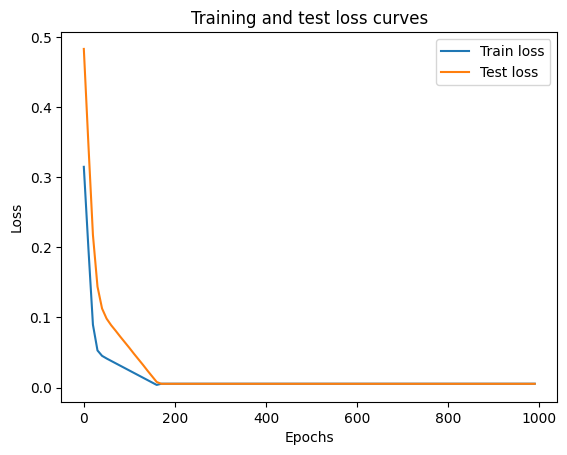

In [ ]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
print("The model learnd the following values for weights and bias")
print(model_linear_reg.state_dict())
print("The original values for weights and bias")
print(f"weight: {weight_linear}, bias: {bias_linear}")

The model learnd the following values for weights and bias
OrderedDict({'weights': tensor([0.6944]), 'bias': tensor([0.2968])})
The original values for weights and bias
weight: 0.7, bias: 0.3


In [ ]:
# Make Prediction with Trained data
model_linear_reg.eval() # evaluation mode
with torch.inference_mode():
  model_linear_reg.to(device='cpu')
  y_preds = model_linear_reg(test_X)

y_preds

tensor([[0.8523],
        [0.8592],
        [0.8662],
        [0.8731],
        [0.8801],
        [0.8870],
        [0.8940],
        [0.9009],
        [0.9078],
        [0.9148],
        [0.9217],
        [0.9287],
        [0.9356],
        [0.9426],
        [0.9495],
        [0.9564],
        [0.9634],
        [0.9703],
        [0.9773],
        [0.9842]])

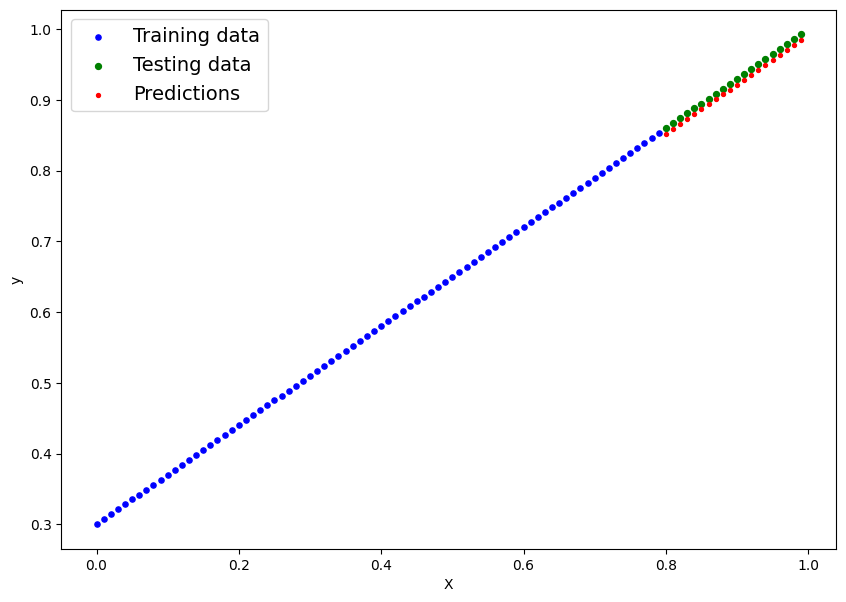

In [ ]:
# [Visualize Prediction After Training Again]
# Then internally calls your model’s forward() method
with torch.inference_mode(): # inference mode --> turns off the grad-track. (Faster)
  y_preds_after_training = model_linear_reg(test_X) # this time training all
plot_predictions(train_data=train_X,
                 train_labels=train_y,
                 test_data=test_X,
                 test_labels=test_y,
                 predictions=y_preds_after_training)

### Saving and Loading Pytorch models

To export it to some sort of application where others can use it?
Do these !!!

In [ ]:
# the recommended way of saving and loading a model for inference is by
# saving and loading mode's state_dict()

In [ ]:
from pathlib import Path

# Create Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict()
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_linear_reg.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model.pth


In [ ]:
# Checking the saved file Path
!ls -l models/01_pytorch_workflow_model.pth

-rw-r--r-- 1 root root 2101 Nov 11 00:49 models/01_pytorch_workflow_model.pth


In [ ]:
# WE are only saving this

model_linear_reg.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.2968]))])

### In order to load that, we need to call torch.load() inside torch.nn.Module.load_state_dict()

In [ ]:
loaded_model_linear_reg = LinearRegression(X=X)
loaded_model_linear_reg.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# if we want to we can load the data and see if the values are matched
loaded_model_linear_reg.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_linear_reg(test_X)

loaded_model_preds

tensor([[0.8523],
        [0.8592],
        [0.8662],
        [0.8731],
        [0.8801],
        [0.8870],
        [0.8940],
        [0.9009],
        [0.9078],
        [0.9148],
        [0.9217],
        [0.9287],
        [0.9356],
        [0.9426],
        [0.9495],
        [0.9564],
        [0.9634],
        [0.9703],
        [0.9773],
        [0.9842]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Linear Model By PyTorch

Instead of using the Random value by using the randn at the nn.Parameter for weight and bias, we gonna be using the nn provided attributes called

In [ ]:
# Frist we gonna need some data
import torch
from torch import nn
import matplotlib.pyplot as plt

print('Torch version: ', torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ', device)

nn_weight = 0.7
nn_height = 0.3

nn_X = torch.arange(0,1, 0.01).unsqueeze(dim=1)
nn_Y = nn_weight * nn_X + nn_height


# split
nn_train_split = int(0.8 * len(nn_X))
nn_train_X, nn_test_X = nn_X[:nn_train_split], nn_X[nn_train_split:]
nn_train_y, nn_test_y = nn_Y[:nn_train_split], nn_Y[nn_train_split:]



Torch version:  2.8.0+cu126
Device:  cpu


In [ ]:
# Here we gonna implement nn.Linear
# Generate auto-parameter
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() instead of nn.Parameter(torch.randn(1, gradient_req=True, dtype = torch.float))
    # nn.Linear() --> creating the model parameters.
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# torch.manual_seed(42)
model_linear_regV2 = LinearRegressionModelV2()
model_linear_regV2, model_linear_regV2.state_dict()



(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
              ('linear_layer.bias', tensor([-0.7336]))]))

In [ ]:
next(model_linear_regV2.parameters()).device # checking current device

device(type='cpu')

In [ ]:
model_linear_regV2.to(device)
next(model_linear_regV2.parameters()).device

device(type='cpu')

### Training with ... nn.Linear() model



In [ ]:
loss_funV2 = nn.L1Loss()
optimizerV2 = torch.optim.SGD(params=model_linear_regV2.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 1000

nn_train_X = nn_train_X.to(device)
nn_test_X = nn_test_X.to(device)
nn_train_y = nn_train_y.to(device)
nn_test_y = nn_test_y.to(device)

for epoch in range(epochs):
  model_linear_regV2.train()
  y_predict_nn = model_linear_regV2(nn_train_X)
  loss = loss_funV2(y_predict_nn, nn_train_y)
  optimizerV2.zero_grad()
  loss.backward()
  optimizerV2.step()

  model_linear_regV2.eval()
  with torch.inference_mode():
    test_predict = model_linear_regV2(nn_test_X)
    test_loss = loss_funV2(test_predict, nn_test_y)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | MAE train Loss: {loss} | MAE Test Loss: {test_loss}" )

Epoch: 0 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 10 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 20 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 30 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 40 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 50 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 60 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 70 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 80 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 90 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 100 | MAE train Loss: 0.0043146018870174885 | MAE Test Loss: 0.006129279732704163
Epoch: 110 | MAE train Loss: 0.0

In [ ]:
from pprint import pprint
print(model_linear_regV2.state_dict())
print(weight_linear, bias_linear)

OrderedDict({'linear_layer.weight': tensor([[0.7062]]), 'linear_layer.bias': tensor([0.3019])})
0.7 0.3
